In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots


In [110]:
ranking_df = pd.read_csv("ranking.csv")
games_df = pd.read_csv("games.csv")
games_details_df = pd.read_csv("games_details.csv", low_memory=False)
players_df = pd.read_csv("players.csv") 

# RANKING DATASET


In [111]:
ranking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201792 entries, 0 to 201791
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TEAM_ID        201792 non-null  int64  
 1   LEAGUE_ID      201792 non-null  int64  
 2   SEASON_ID      201792 non-null  int64  
 3   STANDINGSDATE  201792 non-null  object 
 4   CONFERENCE     201792 non-null  object 
 5   TEAM           201792 non-null  object 
 6   G              201792 non-null  int64  
 7   W              201792 non-null  int64  
 8   L              201792 non-null  int64  
 9   W_PCT          201792 non-null  float64
 10  HOME_RECORD    201792 non-null  object 
 11  ROAD_RECORD    201792 non-null  object 
 12  RETURNTOPLAY   3990 non-null    float64
dtypes: float64(2), int64(6), object(5)
memory usage: 20.0+ MB


In [112]:
ranking_df.shape

(201792, 13)

In [113]:
ranking_df.head(3)

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612756,0,22021,2022-03-12,West,Phoenix,67,53,14,0.791,28-8,25-6,NaN
1,1610612744,0,22021,2022-03-12,West,Golden State,68,46,22,0.676,28-7,18-15,NaN
2,1610612763,0,22021,2022-03-12,West,Memphis,68,46,22,0.676,24-10,22-12,NaN


In [114]:
#changing column names

ranking_df.rename(columns={'G':'NUMBER_OF_GAME'}, inplace = True) # The number of games played
ranking_df.rename(columns={'W':'NUMBER_OF_WIN'}, inplace = True) #The number of games won by a player or team
ranking_df.rename(columns={'L':'NUMBER_OF_LOST'}, inplace = True) #The number of games lost by a player or team
ranking_df.rename(columns={'W_PCT':'WINNING_PERCENTAGE'}, inplace = True)#Winning Percentage

ranking_df.head(5)

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,NUMBER_OF_GAME,NUMBER_OF_WIN,NUMBER_OF_LOST,WINNING_PERCENTAGE,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612756,0,22021,2022-03-12,West,Phoenix,67,53,14,0.791,28-8,25-6,NaN
1,1610612744,0,22021,2022-03-12,West,Golden State,68,46,22,0.676,28-7,18-15,NaN
2,1610612763,0,22021,2022-03-12,West,Memphis,68,46,22,0.676,24-10,22-12,NaN
3,1610612762,0,22021,2022-03-12,West,Utah,67,42,25,0.627,24-10,18-15,NaN
4,1610612742,0,22021,2022-03-12,West,Dallas,67,41,26,0.612,23-12,18-14,NaN


In [115]:
sorted(ranking_df.columns.to_list(),reverse=True)

['WINNING_PERCENTAGE',
 'TEAM_ID',
 'TEAM',
 'STANDINGSDATE',
 'SEASON_ID',
 'ROAD_RECORD',
 'RETURNTOPLAY',
 'NUMBER_OF_WIN',
 'NUMBER_OF_LOST',
 'NUMBER_OF_GAME',
 'LEAGUE_ID',
 'HOME_RECORD',
 'CONFERENCE']

In [116]:
list(ranking_df['TEAM'].unique())

['Phoenix',
 'Golden State',
 'Memphis',
 'Utah',
 'Dallas',
 'Denver',
 'Minnesota',
 'LA Clippers',
 'L.A. Lakers',
 'New Orleans',
 'Portland',
 'San Antonio',
 'Sacramento',
 'Oklahoma City',
 'Houston',
 'Miami',
 'Milwaukee',
 'Philadelphia',
 'Chicago',
 'Boston',
 'Cleveland',
 'Toronto',
 'Brooklyn',
 'Charlotte',
 'Atlanta',
 'Washington',
 'New York',
 'Indiana',
 'Detroit',
 'Orlando',
 'L.A. Clippers',
 'Seattle',
 'New Orleans/Oklahoma City',
 'New Jersey']

In [117]:
#nunique= returns the number of unique values for each column
#this method searches column-wise and returns the number of unique values for each row

ranking_df.RETURNTOPLAY.nunique(dropna=False)

3

In [118]:
#we can do the same thing as;

ranking_df['RETURNTOPLAY'].nunique(dropna=False)

3

In [119]:
#unique= find the unique elements

ranking_df.RETURNTOPLAY.unique()

array([nan,  1.,  0.])

In [120]:
#get the rows if RETURNTOPLAY is 1, and assign it to rtn_to_ply_1_df data frame

rtn_to_ply_1_df = ranking_df[ranking_df['RETURNTOPLAY'] == 1]

In [121]:
rtn_to_ply_1_df.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,NUMBER_OF_GAME,NUMBER_OF_WIN,NUMBER_OF_LOST,WINNING_PERCENTAGE,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
17999,1610612749,0,22019,2020-12-10,East,Milwaukee,73,56,17,0.767,30-5,26-12,1.0
18000,1610612761,0,22019,2020-12-10,East,Toronto,72,53,19,0.736,26-10,27-9,1.0
18001,1610612738,0,22019,2020-12-10,East,Boston,72,48,24,0.667,26-10,22-14,1.0
18002,1610612754,0,22019,2020-12-10,East,Indiana,73,45,28,0.616,25-11,20-17,1.0
18003,1610612748,0,22019,2020-12-10,East,Miami,73,44,29,0.603,29-7,15-22,1.0


In [122]:
#value_counts= it returns objects containing counts of unique values. 

rtn_to_ply_1_df.RETURNTOPLAY.value_counts()

1.0    2394
Name: RETURNTOPLAY, dtype: int64

In [123]:
rtn_to_ply_1_df.RETURNTOPLAY.unique()

array([1.])

In [124]:
#get one and zeros from 'RETURNTOPLAY' column and create a data frame known as 'rtn_to_ply_01_df'

rtn_to_ply_01_df = ranking_df[(ranking_df['RETURNTOPLAY'] == 1) | (ranking_df['RETURNTOPLAY'] == 0) ]
rtn_to_ply_01_df

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,NUMBER_OF_GAME,NUMBER_OF_WIN,NUMBER_OF_LOST,WINNING_PERCENTAGE,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
17999,1610612749,0,22019,2020-12-10,East,Milwaukee,73,56,17,0.767,30-5,26-12,1.0
18000,1610612761,0,22019,2020-12-10,East,Toronto,72,53,19,0.736,26-10,27-9,1.0
18001,1610612738,0,22019,2020-12-10,East,Boston,72,48,24,0.667,26-10,22-14,1.0
18002,1610612754,0,22019,2020-12-10,East,Indiana,73,45,28,0.616,25-11,20-17,1.0
18003,1610612748,0,22019,2020-12-10,East,Miami,73,44,29,0.603,29-7,15-22,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22104,1610612741,0,22019,2020-03-12,East,Chicago,65,22,43,0.338,14-20,8-23,0.0
22105,1610612752,0,22019,2020-03-12,East,New York,66,21,45,0.318,11-22,10-23,0.0
22106,1610612765,0,22019,2020-03-12,East,Detroit,66,20,46,0.303,11-22,9-24,0.0
22107,1610612737,0,22019,2020-03-12,East,Atlanta,67,20,47,0.299,14-20,6-27,0.0


In [125]:
ranking_df

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,NUMBER_OF_GAME,NUMBER_OF_WIN,NUMBER_OF_LOST,WINNING_PERCENTAGE,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612756,0,22021,2022-03-12,West,Phoenix,67,53,14,0.791,28-8,25-6,NaN
1,1610612744,0,22021,2022-03-12,West,Golden State,68,46,22,0.676,28-7,18-15,NaN
2,1610612763,0,22021,2022-03-12,West,Memphis,68,46,22,0.676,24-10,22-12,NaN
3,1610612762,0,22021,2022-03-12,West,Utah,67,42,25,0.627,24-10,18-15,NaN
4,1610612742,0,22021,2022-03-12,West,Dallas,67,41,26,0.612,23-12,18-14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201787,1610612765,0,22013,2014-09-01,East,Detroit,82,29,53,0.354,17-24,12-29,NaN
201788,1610612738,0,22013,2014-09-01,East,Boston,82,25,57,0.305,16-25,9-32,NaN
201789,1610612753,0,22013,2014-09-01,East,Orlando,82,23,59,0.280,19-22,4-37,NaN
201790,1610612755,0,22013,2014-09-01,East,Philadelphia,82,19,63,0.232,10-31,9-32,NaN


In [126]:
# copy 'ranking_df' with not null values removed from RETURNTOPLAY
copy_rnk_df = ranking_df[~ranking_df["RETURNTOPLAY"].isnull()]

In [127]:
copy_rnk_df.RETURNTOPLAY.unique()

array([1., 0.])

In [128]:
# change my index to team
copy_rnk_df.set_index("TEAM",inplace=True)

In [129]:
copy_rnk_df

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,NUMBER_OF_GAME,NUMBER_OF_WIN,NUMBER_OF_LOST,WINNING_PERCENTAGE,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
TEAM,,,,,,,,,,,,
Milwaukee,1610612749,0,22019,2020-12-10,East,73,56,17,0.767,30-5,26-12,1.0
Toronto,1610612761,0,22019,2020-12-10,East,72,53,19,0.736,26-10,27-9,1.0
Boston,1610612738,0,22019,2020-12-10,East,72,48,24,0.667,26-10,22-14,1.0
Indiana,1610612754,0,22019,2020-12-10,East,73,45,28,0.616,25-11,20-17,1.0
Miami,1610612748,0,22019,2020-12-10,East,73,44,29,0.603,29-7,15-22,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Chicago,1610612741,0,22019,2020-03-12,East,65,22,43,0.338,14-20,8-23,0.0
New York,1610612752,0,22019,2020-03-12,East,66,21,45,0.318,11-22,10-23,0.0
Detroit,1610612765,0,22019,2020-03-12,East,66,20,46,0.303,11-22,9-24,0.0


In [130]:
# teams wins and losses
for key,group in copy_rnk_df.groupby("TEAM"):
    print(key,group)

Atlanta             TEAM_ID  LEAGUE_ID  SEASON_ID STANDINGSDATE CONFERENCE  \
TEAM                                                                 
Atlanta  1610612737          0      22019    2020-12-10       East   
Atlanta  1610612737          0      22019    2020-12-09       East   
Atlanta  1610612737          0      22019    2020-12-08       East   
Atlanta  1610612737          0      22019    2020-12-07       East   
Atlanta  1610612737          0      22019    2020-12-06       East   
...             ...        ...        ...           ...        ...   
Atlanta  1610612737          0      22019    2020-03-16       East   
Atlanta  1610612737          0      22019    2020-03-15       East   
Atlanta  1610612737          0      22019    2020-03-14       East   
Atlanta  1610612737          0      22019    2020-03-13       East   
Atlanta  1610612737          0      22019    2020-03-12       East   

         NUMBER_OF_GAME  NUMBER_OF_WIN  NUMBER_OF_LOST  WINNING_PERCENTAGE  \
TEA

In [131]:
copy_rnk_df

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,NUMBER_OF_GAME,NUMBER_OF_WIN,NUMBER_OF_LOST,WINNING_PERCENTAGE,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
TEAM,,,,,,,,,,,,
Milwaukee,1610612749,0,22019,2020-12-10,East,73,56,17,0.767,30-5,26-12,1.0
Toronto,1610612761,0,22019,2020-12-10,East,72,53,19,0.736,26-10,27-9,1.0
Boston,1610612738,0,22019,2020-12-10,East,72,48,24,0.667,26-10,22-14,1.0
Indiana,1610612754,0,22019,2020-12-10,East,73,45,28,0.616,25-11,20-17,1.0
Miami,1610612748,0,22019,2020-12-10,East,73,44,29,0.603,29-7,15-22,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Chicago,1610612741,0,22019,2020-03-12,East,65,22,43,0.338,14-20,8-23,0.0
New York,1610612752,0,22019,2020-03-12,East,66,21,45,0.318,11-22,10-23,0.0
Detroit,1610612765,0,22019,2020-03-12,East,66,20,46,0.303,11-22,9-24,0.0


<AxesSubplot:>

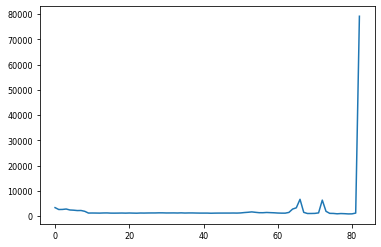

In [132]:
ranking_df.NUMBER_OF_GAME.value_counts().sort_index().plot()

<AxesSubplot:xlabel='TEAM'>

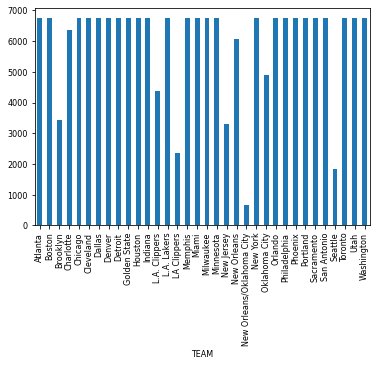

In [133]:
# using groupby plot the number
ranking_df.groupby("TEAM").size().plot(kind='bar')

In [134]:
ranking_df

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,NUMBER_OF_GAME,NUMBER_OF_WIN,NUMBER_OF_LOST,WINNING_PERCENTAGE,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612756,0,22021,2022-03-12,West,Phoenix,67,53,14,0.791,28-8,25-6,NaN
1,1610612744,0,22021,2022-03-12,West,Golden State,68,46,22,0.676,28-7,18-15,NaN
2,1610612763,0,22021,2022-03-12,West,Memphis,68,46,22,0.676,24-10,22-12,NaN
3,1610612762,0,22021,2022-03-12,West,Utah,67,42,25,0.627,24-10,18-15,NaN
4,1610612742,0,22021,2022-03-12,West,Dallas,67,41,26,0.612,23-12,18-14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201787,1610612765,0,22013,2014-09-01,East,Detroit,82,29,53,0.354,17-24,12-29,NaN
201788,1610612738,0,22013,2014-09-01,East,Boston,82,25,57,0.305,16-25,9-32,NaN
201789,1610612753,0,22013,2014-09-01,East,Orlando,82,23,59,0.280,19-22,4-37,NaN
201790,1610612755,0,22013,2014-09-01,East,Philadelphia,82,19,63,0.232,10-31,9-32,NaN


In [135]:
ranking_df.groupby("TEAM").agg({"NUMBER_OF_WIN":['count','max']})

NUMBER_OF_WIN    
                                  count max
TEAM                                       
Atlanta                            6738  60
Boston                             6740  66
Brooklyn                           3446  49
Charlotte                          6364  48
Chicago                            6739  62
Cleveland                          6738  66
Dallas                             6741  67
Denver                             6739  57
Detroit                            6738  64
Golden State                       6740  73
Houston                            6740  65
Indiana                            6738  61
L.A. Clippers                      4384  57
L.A. Lakers                        6738  65
LA Clippers                        2354  53
Memphis                            6740  56
Miami                              6739  66
Milwaukee                          6740  60
Minnesota                          6740  58
New Jersey                         3292  49
New Orleans                        6060  56
New Orleans/Oklahoma City           678  39
New York                           6740  54
Oklahoma City                      4911  60
Orlando                            6738  59
Philadelphia                       6738  52
Phoenix                            6738  62
Portland                           6738  54
Sacramento                         6738  59
San Antonio                        6738  67
Seattle                            1831  52
Toronto                            6738  59
Utah                               6738  54
Washington                         6740  49

In [136]:
toronto = ranking_df.loc[ranking_df["TEAM"] =="Toronto"]

<AxesSubplot:xlabel='TEAM'>

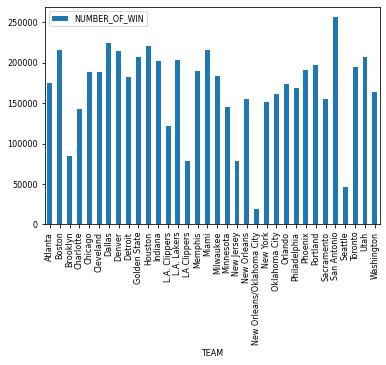

In [137]:
# total number wins of each team
ranking_df.groupby("TEAM").agg({"NUMBER_OF_WIN":'sum'}).plot(kind='bar')

In [138]:
toronto

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,NUMBER_OF_GAME,NUMBER_OF_WIN,NUMBER_OF_LOST,WINNING_PERCENTAGE,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
1731,1610612761,0,22021,2022-03-12,East,Toronto,67,37,30,0.552,17-15,20-15,NaN
1746,1610612761,0,22021,2022-03-11,East,Toronto,66,36,30,0.545,17-15,19-15,NaN
1761,1610612761,0,22021,2022-03-10,East,Toronto,65,35,30,0.538,17-15,18-15,NaN
1776,1610612761,0,22021,2022-03-09,East,Toronto,65,35,30,0.538,17-15,18-15,NaN
1791,1610612761,0,22021,2022-03-08,East,Toronto,64,34,30,0.531,17-15,17-15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201720,1610612761,0,22013,2014-09-05,East,Toronto,82,48,34,0.585,26-15,22-19,NaN
201735,1610612761,0,22013,2014-09-04,East,Toronto,82,48,34,0.585,26-15,22-19,NaN
201750,1610612761,0,22013,2014-09-03,East,Toronto,82,48,34,0.585,26-15,22-19,NaN
201765,1610612761,0,22013,2014-09-02,East,Toronto,82,48,34,0.585,26-15,22-19,NaN


<AxesSubplot:>

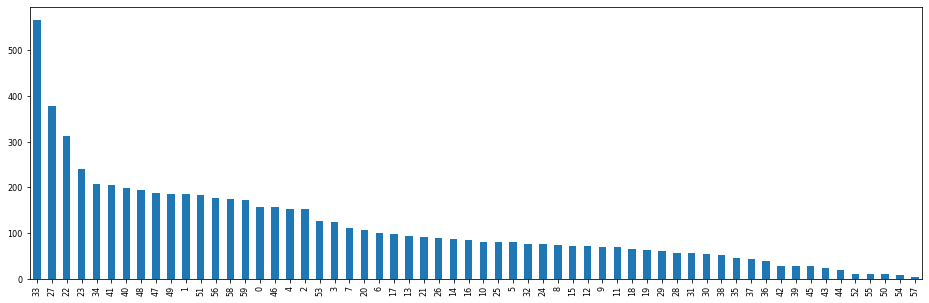

In [139]:
#horizontal bar graph of the number of the wins of Toronto

toronto.NUMBER_OF_WIN.value_counts().plot(kind='bar', figsize = (16,5))


In [140]:
toronto[["SEASON_ID","NUMBER_OF_GAME","NUMBER_OF_WIN","NUMBER_OF_LOST"]]

,SEASON_ID,NUMBER_OF_GAME,NUMBER_OF_WIN,NUMBER_OF_LOST
1731,22021,67,37,30
1746,22021,66,36,30
1761,22021,65,35,30
1776,22021,65,35,30
1791,22021,64,34,30
...,...,...,...,...
201720,22013,82,48,34
201735,22013,82,48,34
201750,22013,82,48,34
201765,22013,82,48,34


In [141]:
ranking_df.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,NUMBER_OF_GAME,NUMBER_OF_WIN,NUMBER_OF_LOST,WINNING_PERCENTAGE,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612756,0,22021,2022-03-12,West,Phoenix,67,53,14,0.791,28-8,25-6,NaN
1,1610612744,0,22021,2022-03-12,West,Golden State,68,46,22,0.676,28-7,18-15,NaN
2,1610612763,0,22021,2022-03-12,West,Memphis,68,46,22,0.676,24-10,22-12,NaN
3,1610612762,0,22021,2022-03-12,West,Utah,67,42,25,0.627,24-10,18-15,NaN
4,1610612742,0,22021,2022-03-12,West,Dallas,67,41,26,0.612,23-12,18-14,NaN


In [165]:
#Finding top 7 winner teams

top_20_winning_team = ranking_df.groupby("TEAM").agg({'NUMBER_OF_WIN':'sum'}).sort_values(by='NUMBER_OF_WIN',ascending=False).head(20)
top_20_winning_team

,NUMBER_OF_WIN
TEAM,
San Antonio,255997
Dallas,224017
Houston,221048
Miami,215962
Boston,215461
Denver,214843
Golden State,206625
Utah,206491
L.A. Lakers,203681


<AxesSubplot:xlabel='TEAM'>

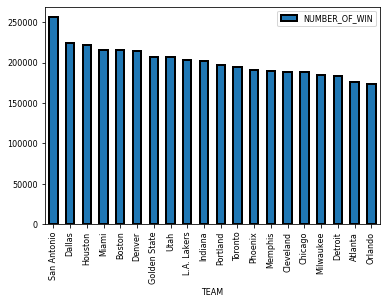

In [169]:
top_20_winning_team.plot(kind='bar',linewidth =2, edgecolor = 'black')

In [173]:
#or the same thing could be achived with these steps;
top_20_winning_team.reset_index(inplace=True)
top_20_winning_team

,TEAM,NUMBER_OF_WIN
0,San Antonio,255997
1,Dallas,224017
2,Houston,221048
3,Miami,215962
4,Boston,215461
5,Denver,214843
6,Golden State,206625
7,Utah,206491
8,L.A. Lakers,203681
9,Indiana,202437


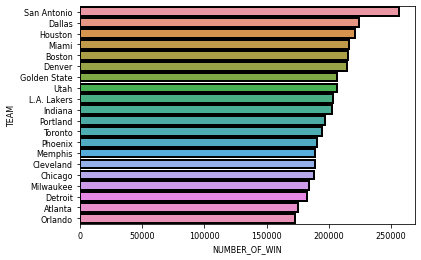

In [174]:
fig = plt.figure(figsize = (6, 4))
ax = sns.barplot (x='NUMBER_OF_WIN',data = top_20_winning_team, y='TEAM',linewidth =2, edgecolor = 'black' )
plt.show()

In [144]:
#Finding top teams that have the highest lost
ranking_df.groupby("TEAM").agg({'NUMBER_OF_LOST':'sum'}).sort_values(by='NUMBER_OF_LOST', ascending= False)

,NUMBER_OF_LOST
TEAM,
Minnesota,234329
New York,229543
Sacramento,225099
Washington,215193
Charlotte,215109
Philadelphia,212643
Orlando,209385
Atlanta,204692
Detroit,197407


In [145]:
#or we can create the table of the 5 teams which have the highest number of lost (same thing)
highest_losts = ranking_df.groupby("TEAM")["NUMBER_OF_LOST"].sum().to_frame("NUMBER_OF_LOST")
highest_losts =  highest_losts.sort_values("NUMBER_OF_LOST", ascending= False)[:5]
highest_losts 

,NUMBER_OF_LOST
TEAM,
Minnesota,234329
New York,229543
Sacramento,225099
Washington,215193
Charlotte,215109


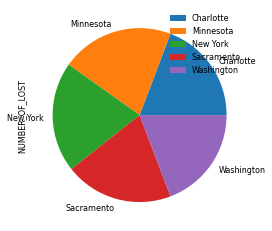

In [146]:
#Pie Chart of highest number of losts based on cities
highest_losts.groupby(['TEAM']).sum().plot(kind='pie', y='NUMBER_OF_LOST')
plt.legend(frameon=False)
plt.rcParams['font.size'] = 8.0

# GAMES DATASET

In [147]:
games_df.shape

(25796, 21)

In [148]:
games_df.head(3)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,...,23.0,53.0,1610612750,113.0,0.422,0.875,0.357,21.0,46.0,0
1,2022-03-12,22101006,Final,1610612741,1610612739,2021,1610612741,101.0,0.443,0.933,...,20.0,46.0,1610612739,91.0,0.419,0.824,0.208,19.0,40.0,1
2,2022-03-12,22101007,Final,1610612759,1610612754,2021,1610612759,108.0,0.412,0.813,...,28.0,52.0,1610612754,119.0,0.489,1.000,0.389,23.0,47.0,0


-- Meaning of the column names;

* PTS= The number of points scored
* FG= field goal attempts that a player makes
* FT= free throw attempts that a player or team has made
-
* PTS_home: Number of points scored by home team
* FG_PCT_home: Field Goal Percentage home team
* FT_PCT_home: Free Throw Percentage of the home team
* FG3_PCT_home: Three Point Percentageof the home team
* AST_home: Assists of the home team
* REB_home: Rebounds of the home team
* TEAM_ID_away: ID of the away team (dupplicate of VISITOR_TEAM_ID)
* PTS_away: Number of points scored by away team
* FG_PCT_away: Field Goal Percentage away team
* FT_PCT_away: Free Throw Percentage of the away team
* FG3_PCT_away: Three Point Percentage of the away team
* AST_away: Assists of the away team
* REB_away: Rebounds of the away team
* HOME_TEAM_WINS: If home team won the game

In [41]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25796 entries, 0 to 25795
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     25796 non-null  object 
 1   GAME_ID           25796 non-null  int64  
 2   GAME_STATUS_TEXT  25796 non-null  object 
 3   HOME_TEAM_ID      25796 non-null  int64  
 4   VISITOR_TEAM_ID   25796 non-null  int64  
 5   SEASON            25796 non-null  int64  
 6   TEAM_ID_home      25796 non-null  int64  
 7   PTS_home          25697 non-null  float64
 8   FG_PCT_home       25697 non-null  float64
 9   FT_PCT_home       25697 non-null  float64
 10  FG3_PCT_home      25697 non-null  float64
 11  AST_home          25697 non-null  float64
 12  REB_home          25697 non-null  float64
 13  TEAM_ID_away      25796 non-null  int64  
 14  PTS_away          25697 non-null  float64
 15  FG_PCT_away       25697 non-null  float64
 16  FT_PCT_away       25697 non-null  float6

# GAMES DETAILS DATASET

In [42]:
games_details_df.head(3)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22101005,1610612750,MIN,Minnesota,1630162,Anthony Edwards,Anthony,F,NaN,36:22,...,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0
1,22101005,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,Jaden,F,NaN,23:54,...,2.0,4.0,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0
2,22101005,1610612750,MIN,Minnesota,1626157,Karl-Anthony Towns,Karl-Anthony,C,NaN,25:17,...,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0


* FGM: Field Goals Made ; The number of field goals that a player or team has made.
* FGA: Field Goals Attempted ; The number of field goals that a player or team has attempted. 
* FG_PCT: Field Goal Percentage ; The percentage of field goal attempts that a player makes ,  (FGM)/(FGA)
* FG3M: Three Pointers Made
* FG3A: Three Pointers Attempted
* FG3_PCT: Three Point Percentage
* FTM: Free Throws Made
* FTA: Free Throws Attempted
* FT_PCT: Free Throw Percentage
* OREB: Offensive Rebounds
* DREB: Defensive Rebounds
* REB: Rebounds
* AST: Assists
* STL: Steals
* BLK: Blocked shots
* TO: Turnovers
* PF: Personnal Foul
* PTS: Number of points scored by the player
* PLUS_MINUS: Plus - Minus



In [43]:
games_details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645953 entries, 0 to 645952
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            645953 non-null  int64  
 1   TEAM_ID            645953 non-null  int64  
 2   TEAM_ABBREVIATION  645953 non-null  object 
 3   TEAM_CITY          645953 non-null  object 
 4   PLAYER_ID          645953 non-null  int64  
 5   PLAYER_NAME        645953 non-null  object 
 6   NICKNAME           30362 non-null   object 
 7   START_POSITION     247215 non-null  object 
 8   COMMENT            105602 non-null  object 
 9   MIN                540350 non-null  object 
 10  FGM                540350 non-null  float64
 11  FGA                540350 non-null  float64
 12  FG_PCT             540350 non-null  float64
 13  FG3M               540350 non-null  float64
 14  FG3A               540350 non-null  float64
 15  FG3_PCT            540350 non-null  float64
 16  FT

In [44]:
players_df.head(3)

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019


In [45]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7228 entries, 0 to 7227
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PLAYER_NAME  7228 non-null   object
 1   TEAM_ID      7228 non-null   int64 
 2   PLAYER_ID    7228 non-null   int64 
 3   SEASON       7228 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 226.0+ KB


In [46]:
games_df.describe()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,2.579600e+04,2.579600e+04,2.579600e+04,25796.000000,2.579600e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.579600e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25796.000000
mean,2.169208e+07,1.610613e+09,1.610613e+09,2011.798341,1.610613e+09,103.106044,0.460313,0.759705,0.355896,22.736779,43.345799,1.610613e+09,100.294120,0.449265,0.758082,0.349413,21.403899,42.085146,0.587494
std,5.496041e+06,8.638857e+00,8.654846e+00,5.397985,8.638857e+00,13.174726,0.056629,0.100692,0.111940,5.177566,6.621832,8.654846e+00,13.343016,0.055528,0.103418,0.110194,5.140897,6.526951,0.492295
min,1.030000e+07,1.610613e+09,1.610613e+09,2003.000000,1.610613e+09,36.000000,0.250000,0.143000,0.000000,6.000000,15.000000,1.610613e+09,33.000000,0.244000,0.143000,0.000000,4.000000,19.000000,0.000000
25%,2.060109e+07,1.610613e+09,1.610613e+09,2007.000000,1.610613e+09,94.000000,0.421000,0.696000,0.286000,19.000000,39.000000,1.610613e+09,91.000000,0.412000,0.692000,0.278000,18.000000,38.000000,0.000000
50%,2.120040e+07,1.610613e+09,1.610613e+09,2012.000000,1.610613e+09,103.000000,0.459000,0.765000,0.355000,23.000000,43.000000,1.610613e+09,100.000000,0.448000,0.765000,0.350000,21.000000,42.000000,1.000000
75%,2.170070e+07,1.610613e+09,1.610613e+09,2016.000000,1.610613e+09,112.000000,0.500000,0.829000,0.429000,26.000000,48.000000,1.610613e+09,109.000000,0.487000,0.833000,0.420000,25.000000,46.000000,1.000000
max,5.200021e+07,1.610613e+09,1.610613e+09,2021.000000,1.610613e+09,168.000000,0.684000,1.000000,1.000000,50.000000,72.000000,1.610613e+09,168.000000,0.687000,1.000000,1.000000,46.000000,81.000000,1.000000


In [47]:
games_df.describe().T

,count,mean,std,min,25%,50%,75%,max
GAME_ID,25796.0,2.169208e+07,5.496041e+06,1.030000e+07,2.060109e+07,2.120040e+07,2.170070e+07,5.200021e+07
HOME_TEAM_ID,25796.0,1.610613e+09,8.638857e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
VISITOR_TEAM_ID,25796.0,1.610613e+09,8.654846e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
SEASON,25796.0,2.011798e+03,5.397985e+00,2.003000e+03,2.007000e+03,2.012000e+03,2.016000e+03,2.021000e+03
TEAM_ID_home,25796.0,1.610613e+09,8.638857e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
PTS_home,25697.0,1.031060e+02,1.317473e+01,3.600000e+01,9.400000e+01,1.030000e+02,1.120000e+02,1.680000e+02
FG_PCT_home,25697.0,4.603128e-01,5.662854e-02,2.500000e-01,4.210000e-01,4.590000e-01,5.000000e-01,6.840000e-01
FT_PCT_home,25697.0,7.597049e-01,1.006920e-01,1.430000e-01,6.960000e-01,7.650000e-01,8.290000e-01,1.000000e+00
FG3_PCT_home,25697.0,3.558964e-01,1.119400e-01,0.000000e+00,2.860000e-01,3.550000e-01,4.290000e-01,1.000000e+00
AST_home,25697.0,2.273678e+01,5.177566e+00,6.000000e+00,1.900000e+01,2.300000e+01,2.600000e+01,5.000000e+01


In [48]:
games_df

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,...,23.0,53.0,1610612750,113.0,0.422,0.875,0.357,21.0,46.0,0
1,2022-03-12,22101006,Final,1610612741,1610612739,2021,1610612741,101.0,0.443,0.933,...,20.0,46.0,1610612739,91.0,0.419,0.824,0.208,19.0,40.0,1
2,2022-03-12,22101007,Final,1610612759,1610612754,2021,1610612759,108.0,0.412,0.813,...,28.0,52.0,1610612754,119.0,0.489,1.000,0.389,23.0,47.0,0
3,2022-03-12,22101008,Final,1610612744,1610612749,2021,1610612744,122.0,0.484,0.933,...,33.0,55.0,1610612749,109.0,0.413,0.696,0.386,27.0,39.0,1
4,2022-03-12,22101009,Final,1610612743,1610612761,2021,1610612743,115.0,0.551,0.750,...,32.0,39.0,1610612761,127.0,0.471,0.760,0.387,28.0,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25791,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
25792,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
25793,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
25794,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


In [49]:
games_df.groupby("SEASON")

# Merging

In [50]:
ranking_df = pd.read_csv("ranking.csv")
games_df = pd.read_csv("games.csv")
games_details_df = pd.read_csv("games_details.csv", low_memory=False)
players_df = pd.read_csv("players.csv") 

In [51]:
merged_df = pd.merge(ranking_df,players_df,on="TEAM_ID")

In [52]:
merged_df.set_index('TEAM',inplace=True)

In [53]:
merged_df.head(1)

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY,PLAYER_NAME,PLAYER_ID,SEASON
TEAM,,,,,,,,,,,,,,,
Phoenix,1610612756,0,22021,2022-03-12,West,67,53,14,0.791,28-8,25-6,NaN,Kelly Oubre Jr.,1626162,2019


In [54]:
merged_df = merged_df[['G','L','W','W_PCT','PLAYER_NAME']]

In [55]:
merged_df.dropna(axis=0)

,G,L,W,W_PCT,PLAYER_NAME
TEAM,,,,,
Phoenix,67,14,53,0.791,Kelly Oubre Jr.
Phoenix,67,14,53,0.791,Dario Saric
Phoenix,67,14,53,0.791,Frank Kaminsky
Phoenix,67,14,53,0.791,Devin Booker
Phoenix,67,14,53,0.791,Ricky Rubio
...,...,...,...,...,...
Orlando,82,59,23,0.280,Ryan Anderson
Orlando,82,59,23,0.280,Anthony Johnson
Orlando,82,59,23,0.280,Adonal Foyle


In [56]:
merged_df.drop_duplicates(inplace=True)

In [57]:
merged_df.groupby('TEAM').agg({'G':'sum','W':'sum','L':'sum'})

,G,W,L
TEAM,,,
Atlanta,3402676,1509800,1892876
Boston,4378135,2537727,1840408
Brooklyn,2056754,859058,1197696
Charlotte,2949555,1070119,1879436
Chicago,3288648,1596176,1692472
Cleveland,4062589,2033876,2028713
Dallas,5929621,3450671,2478950
Denver,3541252,1911723,1629529
Detroit,2357479,1184796,1172683


<AxesSubplot:xlabel='TEAM'>

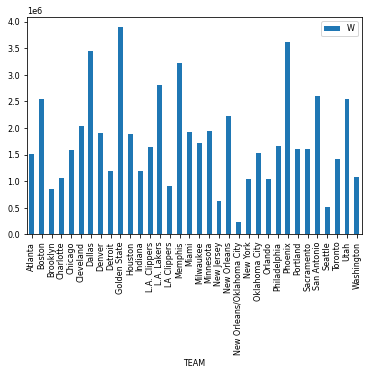

In [58]:
merged_df.groupby('TEAM').agg({'W':'sum'}).plot(kind='bar')

In [59]:
merged_df.groupby('TEAM').agg({'L':'sum'})

,L
TEAM,
Atlanta,1892876
Boston,1840408
Brooklyn,1197696
Charlotte,1879436
Chicago,1692472
Cleveland,2028713
Dallas,2478950
Denver,1629529
Detroit,1172683


<AxesSubplot:ylabel='TEAM'>

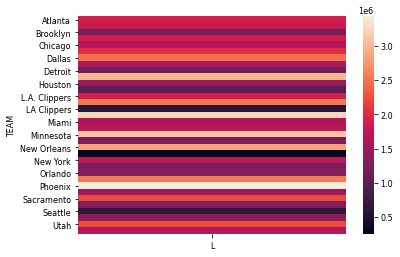

In [60]:
sns.heatmap(merged_df.groupby('TEAM').agg({'L':'sum'}))
